# Linear Regression (Gradient Descent)

This notebook is a work through of the first assignment for the Stanford machine learning class taught by Andrew Ng. I chose to do the assignments in python for the extra challenge of not having any of the code written for me and because python is used more often in industry in matlab.

Obviously, python has multiple linear regression algorithms (and function minimization algoritms) built in, but I believe doing is understanding.

This notebook doesn't analyze the results of the regression, instead it just shows how I implemented gradient descent and confirms the result with the normal equation and a built in-method.

$\\$

First, import the usual suspects

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams.update({'font.size': 20})
import sys
from __future__ import division
if "C:\\My_Python_Lib" not in sys.path:
    sys.path.append("C:\\My_Python_Lib")

## Implement Gradient Descent

Gradient descent to find regression coefficents.

In [11]:
def grad_descent(X, y, alpha = .02, max_iter = 2000, error_plot = True, 
                 converge = .00001, normed = True, add_const = True, normed_coeff = False):
    
    # We are going to change X and y (normalize)
    # but we have to save to original X and y to
    # get back the unnormalized coefficients
    org_X = X
    org_y = y
    
    # normalize X and y
    if normed or normed_coeff:
        X = normalize(X)
        y = normalize(y)
    
    
    # add a column of ones at the beginning of the matrix
    if add_const:
        X = pd.DataFrame(X)
        X.insert(0,"CONSTANT_TERM",np.ones(len(X)))

    
    # initialize variables
    coeff = np.zeros(X.shape[1])
    costs = []
    difference = 1
    
    # Keep updating until converged or reach max iterations
    while (len(costs) < max_iter) and (difference > converge):
        
        # Calculate new parameters 
        hypothesis = np.dot(X,coeff)
        error = hypothesis - y
        cost = sum(error**2)/(2*len(y))
        gradient = np.dot(X.T, error)/len(y)
        coeff = coeff - alpha * gradient
        
        # Add new costs to history
        costs.append(cost)
        
        # Calculate perc difference in cost
        if len(costs) > 1:
            difference = abs(costs[-1] - costs[-2])/costs[-1]

    
    # Denormalize coefficients
    if normed and not normed_coeff:
        coeff = denormalize(coeff, org_X, org_y)
    
    # Plot the cost history
    if error_plot == True:     
        fig, ax = plt.subplots(figsize=(16,9))
        ax.plot(costs)
        ax.set_title("Cost Plot")
        ax.set_ylabel("Cost")
        ax.set_xlabel("Iter")
        
    
    return coeff

$\\$

Normalize a vector, matrix or dataframe. Uses the transformation
$$ x_i \rightarrow \frac{x_i - \bar{x_i}}{s_{x_i}} $$

In [12]:
def normalize(X):

    if len(X.shape) ==1:
        _X = (X - np.mean(X))/(np.std(X))
    else:
        _X = pd.DataFrame()
        for col in X:
            _X[col] = (X[col] - np.mean(X[col]))/(np.std(X[col]))
    return _X

Denormalize coefficients. Normalization improves gradient descent performance considerably but it returns normalized coefficients. While normalized coefficients are useful for interpreation of coefficient importantance, they are a pain to predict with.

The normalized form is: 
$$ \frac{y - \bar{y}}{s_y} = \beta^*_0 + \sum_i \beta^*_i \frac{x_i - \bar{x_i}}{s_{x_i}}$$

We want 
$$ y = \beta_0 + \sum_i \beta_i x$$

Solving 
$$ \beta_0 = s_y \beta^*_0 + \bar{y} - \sum_i \beta^*_i \frac{\bar{x_i}s_y}{s_x}$$
$$ \beta_i = \beta_i^* \frac{s_y}{s_x}$$

In [13]:
def denormalize(coeffs, X, y):
    
      
    if len(coeffs) == 2:
        
        new_coeffs = [(y.std()*coeffs[0] + y.mean()) - (coeffs[1]*X.mean())*(y.std()/X.std()), 
                      coeffs[1]*y.std()/X.std()]

    else:
        xStds = [X[col].std() for col in X]
        yStds = y.std()
        avgs = [X[col].mean() for col in X]
        
        const = []
        new_coeffs = []
        for i in range(len(xStds)):
            new_coeffs.append(coeffs[i+1]*(yStds/xStds[i]))
            const.append(coeffs[i+1]*avgs[i] * yStds/xStds[i])
        
        new_coeffs.insert(0,yStds*coeffs[0]+y.mean()-sum(const))
        
        
    return new_coeffs

## Implement Normal Equation

It is easy to prove that the cost function is minimized when $\theta = (X^TX)^{-1}X^Ty$. Thus when the dimension of the matrix is not to large to make inversion impracticle, an analytical solution can be reached. A function is implemented below to calculate $\theta$ given $X$ and $y$. This function adds a column of ones to the matrix/dataframe themselves.

In [14]:
def normal_method(X,y, add_const = True):
    
    
    # add a column of ones at the beginning of the matrix
    if add_const:
        X = pd.DataFrame(X)
        X.insert(0,"CONSTANT_TERM",np.ones(len(X)))
    
    # calculate and return normal equation
    return np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)

## Population and Profit Study

The following data has the size of the city (in tens of thousands) and the profit of a food truck made in that city. A regression is used to see how the profit correlates with the size of the city the food truck is located in. 

Read in the city data

In [15]:
city_data = pd.read_csv('ex1data1.txt',header=None)
city_data.columns = ['Population','Profit']
city_data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


It is always a good idea to plot your data first!

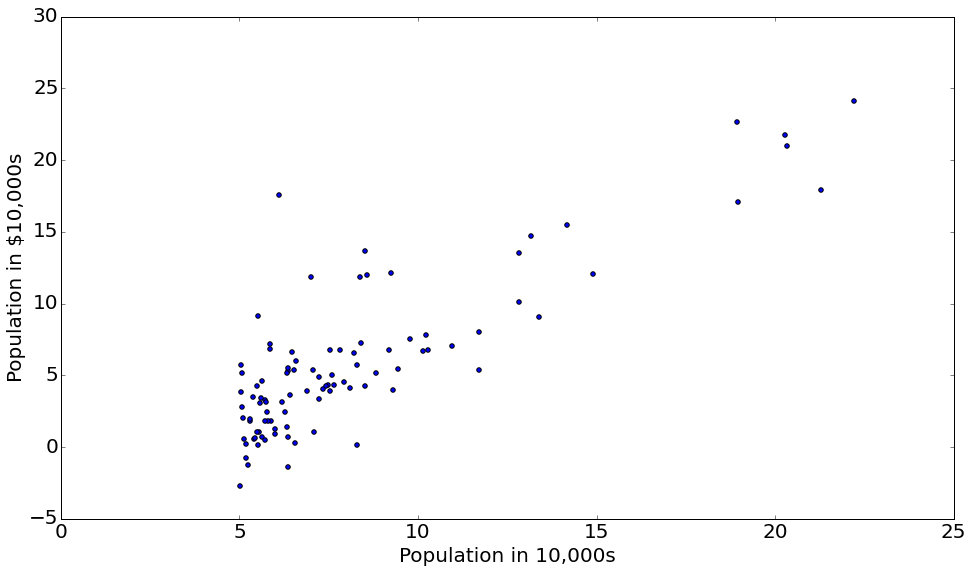

In [16]:
fig, ax = plt.subplots(figsize=(16,9))

ax.scatter(city_data.Population, city_data.Profit);
ax.set_xlabel('Population in 10,000s');
ax.set_ylabel('Population in $10,000s');

Find coefficients using python pandas regression. What I like about this method is the full summary of regression analysis and ease of use with pandas dataframes.

In [17]:
pd.stats.api.ols(x = city_data.Population, y= city_data.Profit)


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         97
Number of Degrees of Freedom:   2

R-squared:         0.7020
Adj R-squared:     0.6989

Rmse:              3.0236

F-stat (1, 95):   223.8257, p-value:     0.0000

Degrees of Freedom: model 1, resid 95

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x     1.1930     0.0797      14.96     0.0000     1.0367     1.3493
     intercept    -3.8958     0.7195      -5.41     0.0000    -5.3060    -2.4856
---------------------------------End of Summary---------------------------------

$\\$

Using the normal equation... Notice the normal equation has the same coefficients as above 

In [18]:
coeff = normal_method(city_data.Population,city_data.Profit)
coeff

array([-3.89578088,  1.19303364])

$\\$

Using gradient descent. The coefficients are very close to the analytical result

[-3.8004785438590343, 1.181354150273956]


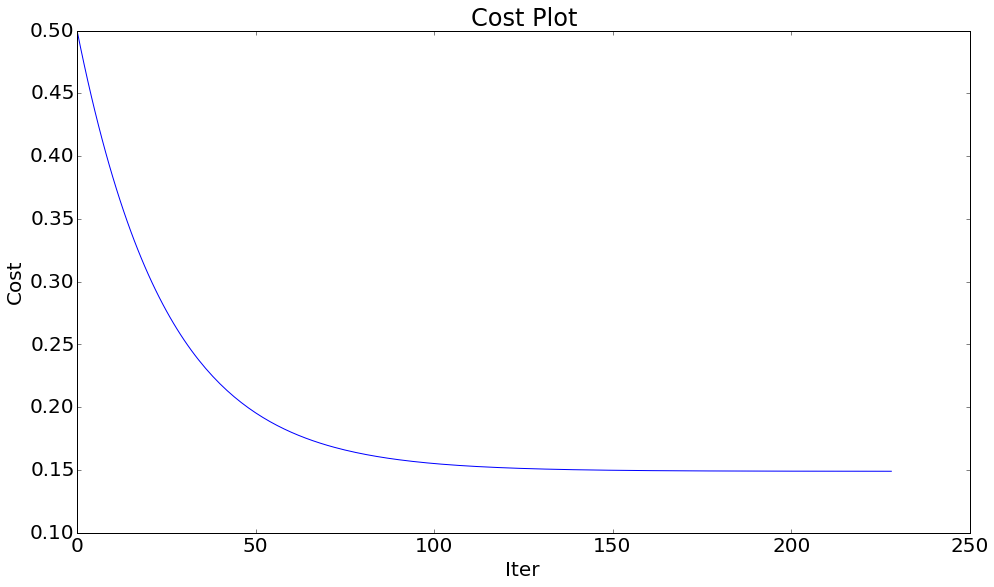

In [19]:
coeff = grad_descent(city_data.Population,city_data.Profit)
print coeff


$\\$

Since the regression is only 2D, we can visualize the fit, looks good!

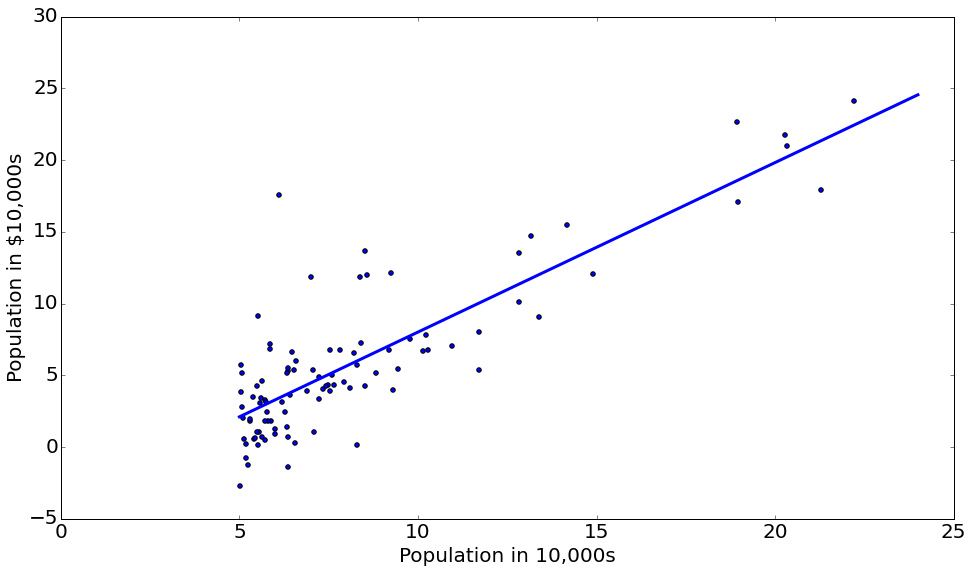

In [20]:
fig, ax = plt.subplots(figsize=(16,9))

ax.scatter(city_data.Population, city_data.Profit);
ax.plot(np.arange(5,25), coeff[0] + coeff[1]*np.arange(5,25), lw = 3)
ax.set_xlabel('Population in 10,000s');
ax.set_ylabel('Population in $10,000s');

$\\$

$\\$

$\\$

## Housing Data

I am selling my house and I want to predict how much my house will go for based on the data collected on other houses in my area are going for. The data I collected contains the size of the house and the number of bedrooms.

$\\$

Read in housing data

In [21]:
housing_data = pd.read_csv('ex1data2.txt',header=None)
housing_data.columns = ['SqFeet','Bedrooms','Price']
housing_data.head()

,SqFeet,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


$\\$

Visualize housing data. The area of the circles are porpotional to the number of bedrooms squared.

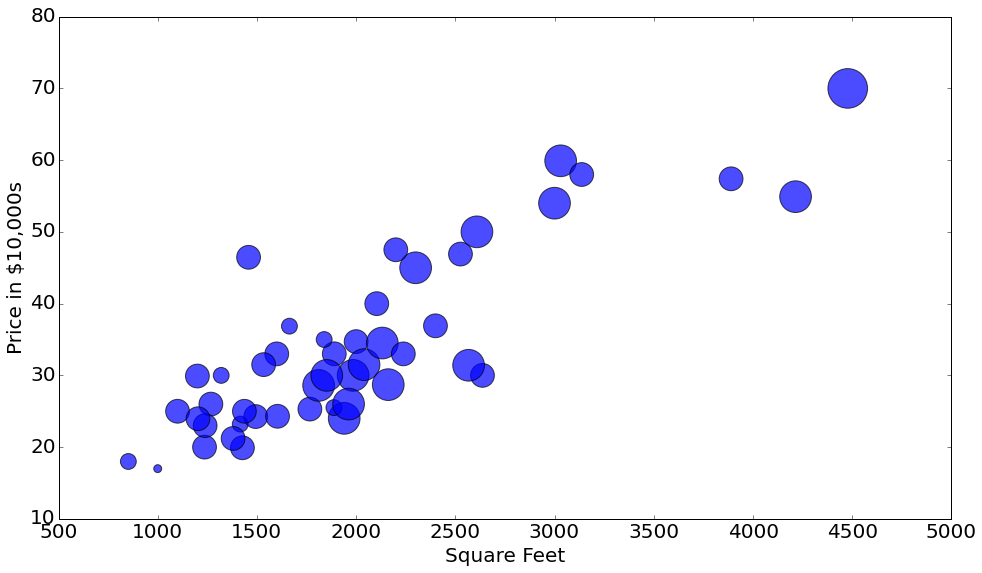

In [22]:
fig, ax = plt.subplots(figsize=(16,9))


ax.scatter(housing_data.SqFeet, housing_data.Price/10000, s= np.pi * 5 * (2*housing_data.Bedrooms)**2, alpha = .7);
ax.set_xlabel('Square Feet');
ax.set_ylabel('Price in $10,000s');

$\\$

Using pandas built in. Notice that the number of bedrooms is not signficant at the 95% level as you might be able to guess from looking at the plot, it is aslo likely correlated with the size of the house. A lot of analysis can be done on a simple regression! 

In [23]:
pd.stats.api.ols(x = housing_data[housing_data.columns[:2]], y = housing_data.Price)


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <SqFeet> + <Bedrooms> + <intercept>

Number of Observations:         47
Number of Degrees of Freedom:   3

R-squared:         0.7329
Adj R-squared:     0.7208

Rmse:          66069.5785

F-stat (2, 44):    60.3800, p-value:     0.0000

Degrees of Freedom: model 2, resid 44

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
        SqFeet   139.2107    14.7951       9.41     0.0000   110.2123   168.2091
      Bedrooms -8738.0191 15450.6959      -0.57     0.5746 -39021.3830 21545.3448
     intercept 89597.9095 41767.4187       2.15     0.0375  7733.7690 171462.0501
---------------------------------End of Summary---------------------------------

$\\$

Using normal equation, again same results!

In [27]:
exact = normal_method(housing_data[housing_data.columns[:2]], housing_data.Price)
print exact

[ 89597.90954479    139.21067402  -8738.01911287]


$\\$

Using gradient descent, again not exact results but not bad! (especially when considering the number of bedrooms is not signficiant)

[86951.524775847036, 137.18972227068207, -6627.8565706146755]


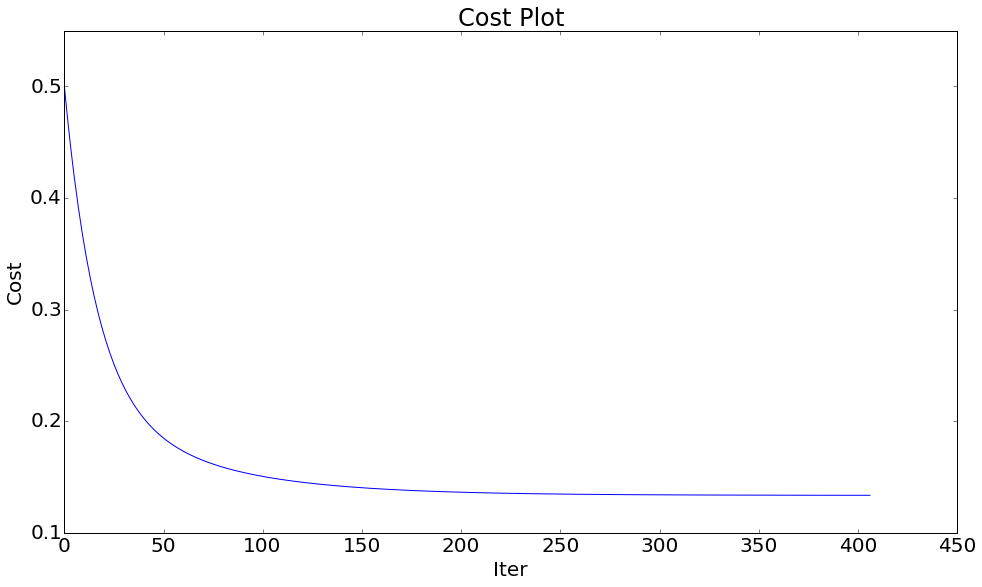

In [28]:
gd = grad_descent(housing_data[housing_data.columns[:2]], housing_data.Price)
print gd